# The big Question

use machine learning to process and transform Titanic data to create a model. This model must predict which people are likely to survive with 80% or greater accuracy.

## A little dive into the data

- Two classes either True (1) and not False (0)
- supervised learning problem
- **Classification** problem since target is categorical
- 10 **features** 
- **target** variable is the Survived
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

To get full description  **[visit](https://data.world/nrippner/titanic-disaster-dataset)**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


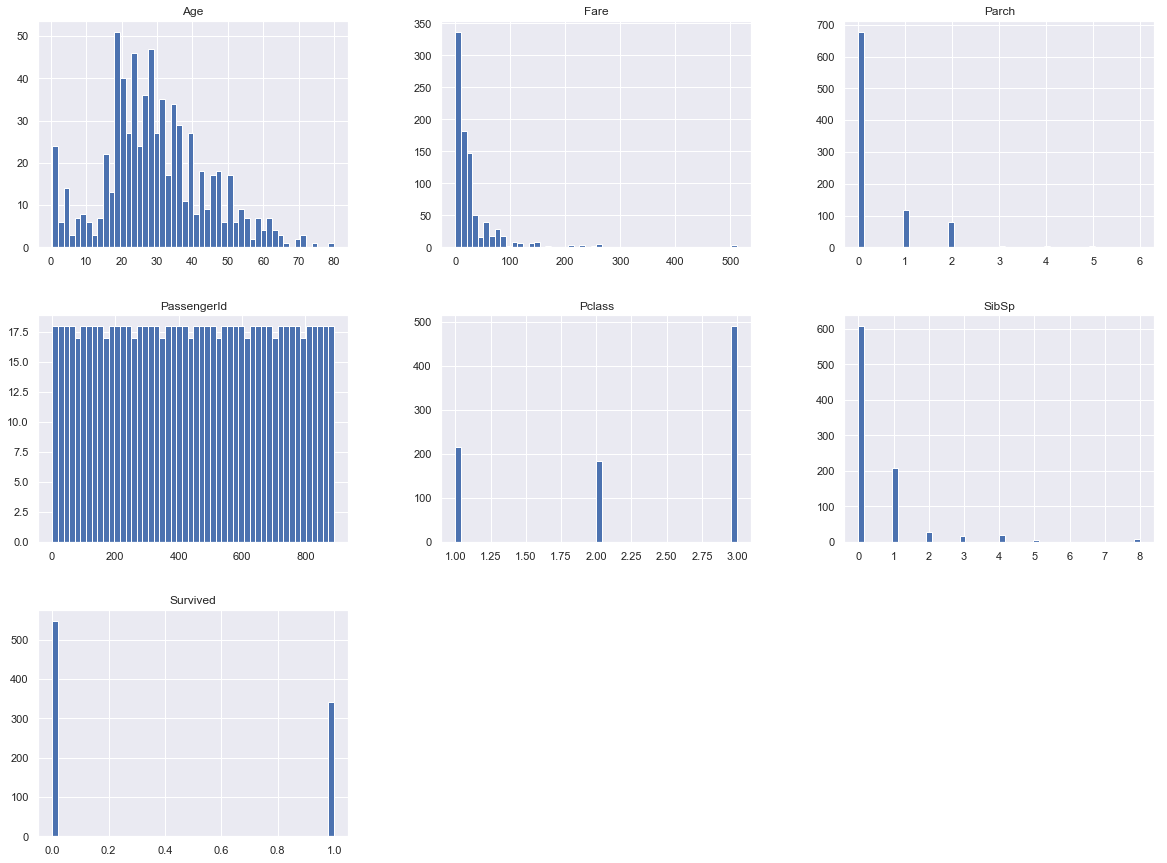

In [7]:
train.hist(bins=50, figsize=(20,15))
plt.show()

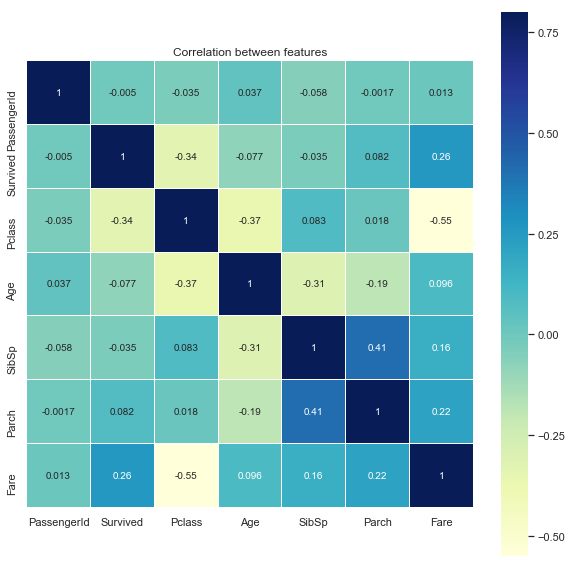

In [8]:
corr=train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [9]:
#correlation of features with target variable
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [10]:
# the missing data in the cabin column is too much,
# and Name, Ticket columns are uselessso we drop them
train.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Handling missing data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

**missing categorical data in**

train: cabin and embarked
test: cabin

**missing numerical data in**

train: age
test: age, fare

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [15]:
num_attribs = list(train.drop(['Embarked','Sex'], axis=1))
num_attribs_test = list(test.drop(['Embarked','Sex'], axis=1))
cat_attribs = ['Embarked','Sex']

In [16]:
imputer =  SimpleImputer(strategy='most_frequent')
train['Embarked'] = imputer.fit_transform((train['Embarked'].values).reshape(-1, 1))

imputer2 = SimpleImputer(strategy="median")

train[num_attribs] = imputer2.fit_transform(train[num_attribs])
test[num_attribs_test] = imputer2.fit_transform(test[num_attribs_test])



In [17]:
labelEnc=LabelEncoder()

for col in cat_attribs:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

In [18]:
corr_matrix= train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

## train, val, test split

In [31]:
from sklearn.model_selection import train_test_split

target="Survived"
y= train[target]
X= train.drop(target, axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test= test
#y_train= y_train.values
#y_val= y_val.values

In [32]:
std_scaler = StandardScaler()

X_train_prep = std_scaler.fit_transform(X_train)
X_val_prep= std_scaler.fit_transform(X_val)
X_test_prep = std_scaler.fit_transform(X_test)

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype in

In [33]:
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)
print(y_train.shape)
print(y_val.shape)

(712, 8)
(179, 8)
(418, 8)
(712,)
(179,)


## model creation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report 

## Creating ML models

In [38]:
estimators = [('log_reg', LogisticRegression()), 
         ('forest_clf', RandomForestClassifier(random_state=0)), ('svm_clf', SVC(probability= True)),
         ('sgd_clf' ,SGDClassifier(loss='log')), ('nb_clf', GaussianNB()), ('knn',KNeighborsClassifier()),
         ('xgboost', XGBClassifier())]

models = [('log_reg', LogisticRegression()), ('tree_clf', DecisionTreeClassifier(random_state=0)),
         ('forest_clf', RandomForestClassifier(random_state=0)), ('svm_clf', SVC(probability= True)),
         ('sgd_clf' ,SGDClassifier(loss='log')), ('nb_clf', GaussianNB()), ('knn',KNeighborsClassifier()),
         ('extra_clf' ,ExtraTreesClassifier()), ('ada_clf', AdaBoostClassifier()), 
         ('gb_clf', GradientBoostingClassifier()), ('bag_clf', BaggingClassifier()),
         ('lgb_clf', LGBMClassifier()), ('xgboost', XGBClassifier()), 
         ('voting_clf', VotingClassifier(estimators=estimators, voting='soft'))]

results= []
names= []
evale= []
cme= []
for name, model in models:
    model.fit(X_train_prep, y_train)
    joblib.dump(model, name +'.pkl')
    accuracy= model.score(X_train_prep, y_train)*100
    y_pred = model.predict(X_val_prep)
    val_accuracy= accuracy_score(y_val, y_pred)*100
    cv= cross_val_score(model, X_train_prep, y_train,
                            scoring='accuracy', cv=10)     
    pre= precision_score(y_val, y_pred)
    recall= recall_score(y_val, y_pred)
    y_scores = model.predict_proba(X_val_prep)[:, 1]
    auc= roc_auc_score(y_val, y_scores)    
    results.append([accuracy, pre, recall, auc, cv])
    names.append(name)
    eval= "%s:\t%f\t%f\t%f\t%f\t%f\t%f (%f)" % (name, accuracy, val_accuracy, pre*100, recall*100, auc*100, cv.mean()*100, cv.std()*100)
    evale.append(eval)
    y_pred = model.predict(X_val_prep)
    c_matrix = confusion_matrix(y_val, y_pred)
    cme.append([name, c_matrix])

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 10

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None

In [39]:
print("""\t\t training\t validating
NAME\t\t ACCURACY\tACCURACY\tPRECISION\tRECALL\t\t   AUC\t\t CV_MEAN (CV_STD)""") 
print('='*117)
for eval in evale:
    print(eval)
    print('='*117)

		 training	 validating
NAME		 ACCURACY	ACCURACY	PRECISION	RECALL		   AUC		 CV_MEAN (CV_STD)
log_reg:	80.477528	79.888268	78.787879	70.270270	87.464607	79.359099 (7.808794)
tree_clf:	100.000000	77.094972	72.602740	71.621622	76.287001	74.157053 (4.494314)
forest_clf:	98.455056	78.770950	77.272727	68.918919	83.268983	78.087078 (5.920479)
svm_clf:	83.988764	81.005587	81.250000	70.270270	83.693694	82.160295 (7.259612)
sgd_clf:	63.202247	59.217877	50.819672	41.891892	61.634492	70.085960 (6.172811)
nb_clf:	79.915730	77.094972	73.913043	68.918919	84.736165	79.339090 (7.356965)
knn:	84.971910	80.446927	80.000000	70.270270	85.836551	78.938241 (6.099061)
extra_clf:	100.000000	79.888268	79.687500	68.918919	86.132561	76.823441 (4.058396)
ada_clf:	83.988764	77.653631	76.562500	66.216216	86.087516	80.459926 (8.069731)
gb_clf:	90.589888	76.536313	79.629630	58.108108	88.571429	82.997541 (5.738813)
bag_clf:	97.752809	76.536313	80.769231	56.756757	82.355212	80.338922 (6.140843)
lgb_clf:	99.297753	83.240

In [25]:
for cm in cme:
    print(cm)
    print('='*75)

['log_reg', array([[91, 14],
       [22, 52]], dtype=int64)]
['tree_clf', array([[78, 27],
       [21, 53]], dtype=int64)]
['forest_clf', array([[92, 13],
       [20, 54]], dtype=int64)]
['svm_clf', array([[93, 12],
       [22, 52]], dtype=int64)]
['sgd_clf', array([[94, 11],
       [31, 43]], dtype=int64)]
['nb_clf', array([[87, 18],
       [23, 51]], dtype=int64)]
['knn', array([[92, 13],
       [22, 52]], dtype=int64)]
['extra_clf', array([[95, 10],
       [22, 52]], dtype=int64)]
['ada_clf', array([[90, 15],
       [25, 49]], dtype=int64)]
['gb_clf', array([[94, 11],
       [31, 43]], dtype=int64)]
['bag_clf', array([[86, 19],
       [26, 48]], dtype=int64)]
['lgb_clf', array([[94, 11],
       [19, 55]], dtype=int64)]
['xgboost', array([[88, 17],
       [23, 51]], dtype=int64)]
['voting_clf', array([[92, 13],
       [22, 52]], dtype=int64)]


C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better fo

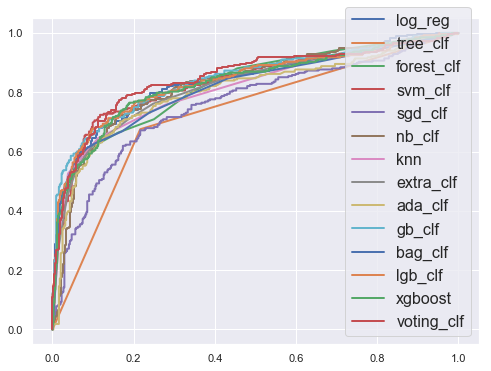

In [26]:
plt.figure(figsize=(8, 6))
for name, model in models:
    model.fit(X_train_prep, y_train)
    y_scores = cross_val_predict(model, X_train_prep, y_train, cv=3,
 method="predict_proba")[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train,y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.legend(loc="lower right", fontsize=16)
plt.show()


In [27]:
gggg

NameError: name 'gggg' is not defined

## the best model is knn, logreg

In [ ]:
knn = joblib.load('knn.pkl')
knn.fit(X_train_prep, y_train)


In [ ]:
y_pred = knn.predict(X_val_prep)
accuracy= metrics.accuracy_score(y_val, y_pred)
c_matrix = confusion_matrix(y_val, y_pred)
print(accuracy*100)
print(c_matrix)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
# print the first 25 true and predicted responses
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

In [ ]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(c_matrix, cmap=plt.cm.gray)

In [ ]:
#focusing on only the errors
row_sums = c_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = c_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

from the representation shown above it shows that the generalizes well, but its making a few errors

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_pred))

In [ ]:
y_scores = cross_val_predict(voting_clf, X_train_prep, y_train, cv=3,
 method="predict_proba")[:, 1]

## Hyperparameter tuning for knn

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
k_range = list(range(1, 10))
scores = []
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_prep, y_train)
    y_pred = knn.predict(X_val_prep)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    cv = cross_val_score(knn, X_train_prep, y_train, cv=10, scoring='accuracy')
    cv_scores.append(cv.mean())

In [ ]:
# plot the relationship between K and validating accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
# plot the relationship between K and Cross-Validated Accuracy
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend(['validating Accuracy', 'Cross-Validated'])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_prep, y_train)
y_pred = knn.predict(X_val_prep)
print(metrics.accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
y_scores = knn.predict_proba(X_val_prep)[:, 1]
print(roc_auc_score(y_val,y_scores))

In [ ]:
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

In [ ]:
final_model= grid_search.best_estimator_
joblib.dump(final_model, 'final_model.pkl')

## Submission

In [ ]:
sub_train= pd.read_csv('train.csv')
sub_train, sub_val = train_test_split(sub_train, test_size=0.2, random_state=42)
sub_test= pd.read_csv('test.csv')

In [ ]:
print(sub_train.shape)
print(sub_val.shape)
print(sub_test.shape)

In [ ]:
sub_train.head()

In [ ]:
pid_train= sub_train['PassengerId']
pid_val= sub_val['PassengerId']
pid_test= sub_test['PassengerId']

In [ ]:
pid_val=pd.DataFrame(pid_val, columns=['PassengerId']).reset_index(drop=True)
y_preds= pd.DataFrame(y_pred, columns=['Survived'])

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
submission.to_csv('val_submission.csv', index= False)

In [ ]:
pid_test=pd.DataFrame(pid_test, columns=['PassengerId']).reset_index(drop=True)
y_preds= pd.DataFrame(y_pred, columns=['Survived'])

In [ ]:
submission.head()

In [ ]:
submission= pd.concat([pid_test, y_preds], axis=1)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('test_submission.csv', index= False)

## hyperparameter tunning for logreg

In [ ]:
log_reg= LogisticRegression()
log_reg.fit(X_train_prep, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ 'max_iter': range(1, 1000)
                    ,'solver':['warn']}]

grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                       scoring='precision_macro' ) #since we want more precision than recall
grid_search.fit(X_train_prep, y_train)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
#grid_search.best_estimator
y_pred = grid_search.best_estimator_.predict(X_val_prep)
print(metrics.accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
y_scores = grid_search.best_estimator_.predict_proba(X_val_prep)[:, 1]
print(roc_auc_score(y_val,y_scores))

In [ ]:
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

In [ ]:
final_model= grid_search.best_estimator_
joblib.dump(final_model, 'final_model.pkl')